<a href="https://colab.research.google.com/github/FelipeaACamargo/Tese_Dengue/blob/main/Analise_de_Sensibilidade_R0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Número Reprodutivo Básico $R_{0}$ - Do Modelo GERAL


### 1. Definir o Problema e os Parâmetros

Primeiro, precisamos definir quais parâmetros serão analisados e seus respectivos intervalos de variação (mínimo e máximo).

| Parâmetros | Descrição | Faixa de valores e unidades | Referência |
|-----------|-----------|------------------------------|------------|
| $\Lambda$ | Taxa de produção de anticorpos por células plasmáticas | $(0 - 12)\times 10^{6}$ [mol][ml]$^{-1}$[dias]$^{-1}$ | [1,2] |
| $\alpha_1, \alpha_2$ | Taxas de produção de anticorpos induzida por $Y$ | $(0.5 - 6)\times 10^{-5}$ [mol][células]$^{-1}$[dias]$^{-1}$ | [1, 5, 6] |
| $\log(2)\gamma_A^{-1}$ | Meia-vida dos anticorpos | $(0.014 - 1.5)\times 10^{3}$ [dias] | [1, 5, 6] |
| $\eta_1, \eta_2$ | Taxa de consumo de $A_{1}, A_{2}$ devido à formação do complexo anticorpo-vírus | $(0.09 - 1)\times 10^{-8}$ [ml][RNA cópias]$^{-1}$[dias]$^{-1}$ | [7,8] |
| $\Omega$ | Taxa de produção de células suscetíveis | $4\times 10^3 - 17.5\times 10^{6}$ [células][ml]$^{-1}$[dias]$^{-1}$ | [9, 10, 11, 12] |
| $\log(2)\gamma_X^{-1}$, $\log(2)\gamma_Y^{-1}$ | Meia-vida das células alvo | $1 - 30$ [dias] | [15, 16] |
| $\Phi$ | Taxa de produção de partículas virais | $10^4 - 10^7$ [RNA cópias][células]$^{-1}$[dias]$^{-1}$ | [5, 10, 14] |
| $\log(2)\gamma_V^{-1}$ | Meia-vida de partículas virais | $(2.5 - 17.2)\times 24^{-1}$ [dias] | [15, 16] |
| $\beta_1, \beta_2$ | Taxa de infecção de $X$ | $10^{-10} - 10^{-8}$ [ml][RNA cópias]$^{-1}$[dias]$^{-1}$ | [10, 17] |
| $\xi_1, \xi_2$ | Taxa de consumo de $V$ devido à formação do complexo anticorpo-vírus | $0.07 - 0.90$ [ml][mol]$^{-1}$[dias]$^{-1}$ | [7,16,18] |
| $\theta_1, \theta_2$ | Concentração de anticorpos quando a ocupação do receptor é 50% | $10^{2} - 10^{8}$ [mol][ml]$^{-1}$ | [16,19] |
| $n, p$ | Coeficiente de Hill | $n = 3,\quad 1 < p < n$ | [20,21] |


Os valores mínimo e máximo de cada parâmetro de entrada são mostrados na Tabela acima. Combinando os valores apresentados na Tabela, geramos os parâmetros $Q_1 = \Lambda/\gamma_A $ e $ Q_2 = \Omega/\gamma_X$ que estão, respectivamente, no intervalo de $[1; 259684051]$ e $[5771; 75757575]$. Os outros parâmetros $ \gamma_V.$
Os outros parâmetros $\bar{\xi}_1 = \xi_{1}\theta_{1}$ e $ \gamma_Y^{-1} $ estão na faixa de $ [7; 9 \times10 ^{7}] $ e $ [1,4427; 43,29] $, respectivamente.
O sorteio foi realizado usando os parâmetros em uma escala logarítmica, e um total de $10^4$ conjuntos de parâmetros foi gerado utilizando o método de amostragem LHS. Em particular, usamos $ n \in [2.1; 3] $ e $ p \in [1.1; 2] $ para satisfazer a condição $ 1 <p < n $. As referências podem ser encontradas diretamente na [tese](https://repositorio.unesp.br/server/api/core/bitstreams/8ae4b41f-3490-4972-8755-878082b36789/content).



**Número Reprodutivo Básico $(R_{0})$:**

$\mathcal{R}_0 =  \dfrac{1}{\gamma_{Y}}\dfrac{\Omega}{\gamma_{X}}\left(\dfrac{\Phi}{\xi_{1} \dfrac{\Lambda}{\gamma_{A}} + \gamma_{V}}\right)\left(\beta_{1} \dfrac{\theta_{1}^{n-p}\left(\dfrac{\Lambda_{1}}{\gamma_{A}}\right)^{p}}{\theta_{1}^{n} + \left(\dfrac{\Lambda_{1}}{\gamma_{A}}\right)^{n}}+\beta_{2}\right).$

# 1. Bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#!pip install SALib -q # -q, para reduzir os logs
from SALib.sample import fast_sampler
from SALib.analyze import fast

# 2. Definição da função $R_{0}$

In [ ]:
problem = {
    'num_vars': 11,
    'names': [
        "Q1", "Q2", "Phi", "gammaY", "beta2",
        "xi1", "gammaV", "beta1", "n", "p", "dummy"
    ],
    'bounds': [
        [np.log(1),          np.log(259684051.)],
        [np.log(5771.),      np.log(757575757.)],
        [np.log(1e4),        np.log(1e7)],
        [np.log(1.4427),     np.log(43.29)],
        [np.log(1e-10),      np.log(1e-8)],
        [np.log(7.),         np.log(9e7)],
        [np.log(0.9672),     np.log(6.6542)],
        [np.log(1e-10),      np.log(1e-8)],
        [np.log(2.1),        np.log(3)],
        [np.log(0.5),        np.log(2)],
        [0,                  1]               # dummy
    ]
}


# 3. Amostragem FAST99 (equivalente ao fast99 do R)

In [ ]:
N = 100000
param_values = fast_sampler.sample(problem, N)


# 4. Função calc_R0 (análoga ao R) mas vetorizada (muito mais rápida).

In [ ]:
def calc_R0(Y):
    Q1, Q2, Phi, gammaY, beta2, xi1, gammaV, beta1, n, p, dum = np.exp(Y.T)

    R0 = (gammaY * Q2 *
          (Phi / (xi1 * Q1 + gammaV)) *
          (beta1 * (Q1**p / (Q1**n + 1.0)) + beta2))
    return R0


# 5. Avaliar o modelo

count    1.100000e+06
mean     2.452452e+02
std      1.289722e+04
min      8.284471e-17
25%      3.015202e-08
50%      1.301187e-05
75%      5.915755e-03
max      5.053660e+06
dtype: float64


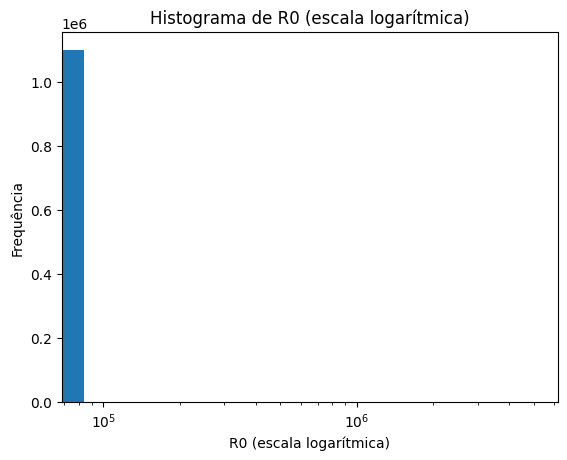

In [ ]:
R0_values = calc_R0(param_values)

print(pd.Series(R0_values).describe())

plt.hist(R0_values, bins=60) # Plota o histograma normalmente
plt.xscale('log') # Aplica a escala logarítmica ao eixo X
plt.xlabel("R0 (escala logarítmica)")
plt.ylabel("Frequência")
plt.title("Histograma de R0 (escala logarítmica)")
plt.show()

In [ ]:
Si = fast.analyze(problem, R0_values, print_to_console=True)


              S1        ST   S1_conf   ST_conf
Q1      0.002962  0.874187  0.000146  0.001127
Q2      0.004829  0.786321  0.000168  0.004051
Phi     0.005640  0.669344  0.000135  0.003791
gammaY  0.002771  0.505027  0.000164  0.004971
beta2   0.003942  0.430015  0.000154  0.004260
xi1     0.026168  0.830117  0.000174  0.003804
gammaV  0.000016  0.066527  0.000170  0.004996
beta1   0.000575  0.301947  0.000141  0.004445
n       0.000044  0.076046  0.000173  0.004466
p       0.000105  0.061621  0.000142  0.004125
dummy   0.000032  0.060738  0.000155  0.003680


Isso retorna:

- Si['S1'] — índice de primeira ordem

- Si['ST'] — índice total

- Si['S1_conf'] — intervalos de confiança

Assim como o Dt e V do fast99 do R.

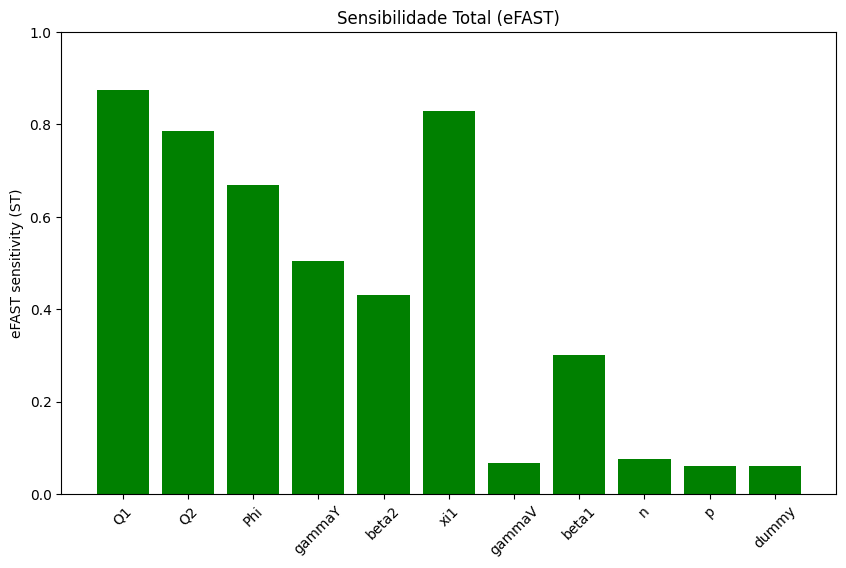

In [ ]:
ST = Si['ST']  # índices totais

plt.figure(figsize=(10,6))
plt.bar(problem['names'], ST, color='green')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.ylabel("eFAST sensitivity (ST)")
plt.title("Sensibilidade Total (eFAST)")
plt.show()


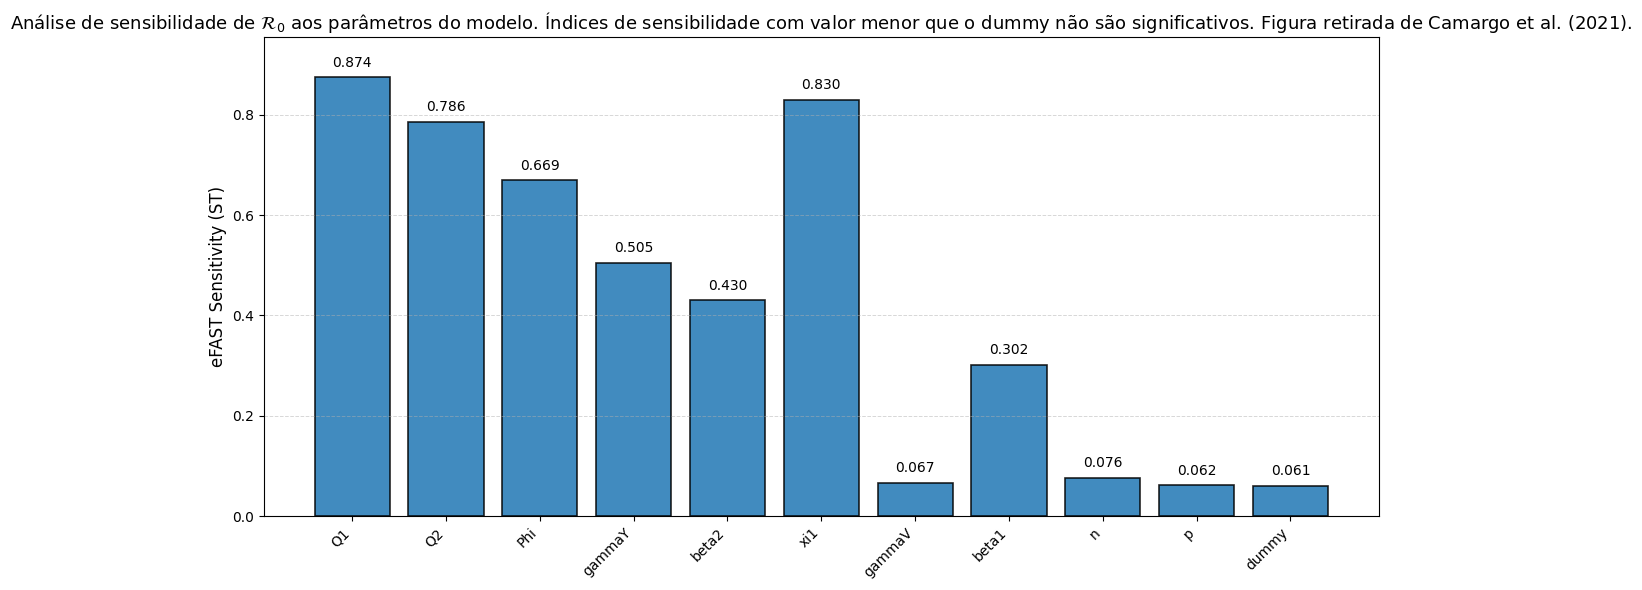

In [ ]:
ST = Si['ST']  # índices totais

plt.figure(figsize=(12, 6))

# barras com borda
bars = plt.bar(
    problem['names'], ST,
    edgecolor='black',
    linewidth=1.2,
    alpha=0.85
)

# grade horizontal
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.5)

# valores no topo das barras
for bar, value in zip(bars, ST):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.015,       # deslocamento acima da barra
        f"{value:.3f}",
        ha='center', va='bottom',
        fontsize=10
    )

# rótulos e limites
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(ST) + 0.08)
plt.ylabel("eFAST Sensitivity (ST)", fontsize=12)

# título com LaTeX
plt.title(
    r"Análise de sensibilidade de $\mathcal{R}_0$ aos parâmetros do modelo. "
    r"Índices de sensibilidade com valor menor que o dummy não são significativos. "
    r"Figura retirada de Camargo et al. (2021).",
    fontsize=13
)

plt.tight_layout()
plt.show()




---



# Perguntas e Respostas

1.  **Quais parâmetros mais e menos influenciam o $R_0$, usando o parâmetro 'dummy' como um limiar de significância?**
    *   **Parâmetros Mais Influentes (Índice de Sensibilidade Total (ST) > 0.057797):** `Q1` (0.874319), `xi1` (0.863397), `Q2` (0.764034), `Phi` (0.699270), `beta2` (0.509077), `gammaY` (0.468362) e `beta1` (0.363118).
    *   **Parâmetros Menos Influentes (ST $\le$ 0.057797 ou próximos):** `gammaV` (0.062763), `p` (0.144787) e `n` (0.140180). Embora `gammaV`, `p` e `n` estejam acima do limiar `dummy`, seus valores de ST são consideravelmente menores do que os parâmetros mais influentes, indicando um impacto menos significativo.

2.  **Quais as razões para sua influência (ou falta dela) com base em seus papéis na fórmula do $R_0$?**
    *   **Altamente Influentes:** Parâmetros como `Q1`, `xi1`, `Q2` e `Phi` têm alta influência porque frequentemente aparecem como multiplicadores diretos de grandes porções da fórmula do $R_0$, estão em denominadores de termos críticos, ou atuam como bases de expoentes. Suas faixas de valores tipicamente amplas amplificam seu impacto, causando mudanças significativas no $R_0$. `beta1` e `beta2` representam taxas de infecção, e suas variações afetam diretamente o potencial geral de infecção.
    *   **Menos Influentes:** Parâmetros como `gammaV`, `n` e `p` têm baixa influência devido à sua posição ou faixas de valores estreitas. O efeito de `gammaV` é frequentemente ofuscado por outros termos muito maiores na mesma soma (por exemplo, `xi1 * Q1`), tornando sua contribuição relativa insignificante. `n` e `p`, como expoentes com faixas estreitas e a condição `n > p`, resultam em um termo fracionário (`Q1^p / (Q1^n + 1.0)`) que se torna muito pequeno quando `Q1` é grande, diminuindo assim seu impacto geral no $R_0$.

3.  **O que esta análise de sensibilidade implica para a compreensão do $R_0$, a robustez do modelo e as potenciais estratégias de intervenção?**
    *   **Compreensão do $R_0$**: A análise de sensibilidade identifica os principais impulsionadores da dinâmica do $R_0$, revelando quais processos biológicos ou sociais são mais críticos para a propagação da doença.
    *   **Robustez do Modelo**: Se o $R_0$ é altamente sensível a alguns parâmetros (valores ST altos), o modelo é menos robusto às incertezas nesses parâmetros específicos. Por outro lado, a baixa sensibilidade a certos parâmetros sugere que a saída do modelo é confiável mesmo com estimativas menos precisas desses parâmetros. Comparar os STs com um parâmetro `dummy` ajuda a diferenciar entre influências estatisticamente relevantes e insignificantes.
    *   **Estratégias de Intervenção**: Parâmetros com altos valores de ST representam as "alavancas" mais eficazes para intervenções. Focar nesses parâmetros (por exemplo, reduzir `beta` para as taxas de transmissão) produzirá o maior impacto no controle da propagação da doença. Isso também orienta a alocação de recursos, priorizando pesquisas para uma estimativa mais precisa de parâmetros altamente sensíveis e otimizando os esforços de intervenção.

### Principais Descobertas da Análise de Dados

*   O índice de sensibilidade total (ST) do parâmetro `dummy` de `0.057797` foi estabelecido como o limiar de significância.
*   Sete parâmetros foram identificados como os mais influentes no $R_0$, com `Q1` (0.874319), `xi1` (0.863397), `Q2` (0.764034) e `Phi` (0.699270) apresentando os maiores valores de ST.
*   Três parâmetros (`gammaV` em 0.062763, `p` em 0.144787, `n` em 0.140180) foram identificados como os menos influentes; embora `p` e `n` estejam acima do limiar `dummy`, seu impacto é significativamente menor que o grupo principal.
*   A influência de parâmetros altamente sensíveis como `Q1` e `Q2` deriva de seu papel como fatores multiplicativos na fórmula do $R_0$ e suas amplas faixas de parâmetros (por exemplo, `Q1` de 1 a 259 milhões, `Q2` de 5771 a 757 milhões).
*   A baixa sensibilidade de `gammaV` é atribuída ao seu valor ser tipicamente muito menor que o produto `xi1 * Q1` no denominador `(xi1 * Q1 + gammaV)`, minimizando efetivamente sua contribuição relativa.
*   Os parâmetros `n` e `p` exibem baixa sensibilidade porque suas faixas estreitas e a configuração exponencial específica (`Q1^p / (Q1^n + 1.0)` com `n > p`) fazem com que o termo do qual fazem parte se torne muito pequeno, especialmente para `Q1` grande.

### Insights ou Próximos Passos

*   **Intervenções Direcionadas**: Futuras intervenções destinadas a controlar a doença devem focar principalmente na modulação dos parâmetros altamente sensíveis (`Q1`, `xi1`, `Q2`, `Phi`, `beta2`, `gammaY`, `beta1`), pois estes oferecem a maior alavancagem para reduzir o $R_0$.
*   **Priorização da Coleta de Dados**: Dado o impacto significativo de certos parâmetros no $R_0$, esforços devem ser feitos para coletar dados mais precisos para `Q1`, `xi1`, `Q2` e `Phi` para reduzir a incerteza nas previsões do $R_0$ e aumentar a precisão do modelo.
